# Intensive and extensive margins (from monthly data)

In [1]:
# This notebook adds up growth in exports and imports of french firms, counting separately growth associated to a firm on its first 12 months of activity.

In [2]:
#Import modules

import pandas as pd
from IPython.display import display, HTML
from numpy import log10, nan, inf, random, clip, arange

display(HTML("<style>.container { width:100% !important; }</style>"))

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Sampling of firms with size around 1M EUR (size is trade volume)
path1 = './../../../../../media/miglesia/Elements/export_france/data/type1/DP1610_MAASTRICHT1_1997_2013'

df = pd.read_csv(path1+'/samplings/firm_sample_YMmxp_02_05_nmax.csv')


In [4]:
df_table = df.loc[df.IMPORT == 0].groupby(['YEAR', 'MONTH', 'ID'])[['VART_sum']].sum().unstack()
df_table.columns = df_table.columns.droplevel(0)

# sample data. Monthly exports, one column for each firm.
df_table.sample(5, axis = 1)

ID          380725473  409876083  408479806  316879030  572029163
YEAR MONTH                                                       
2002 1            NaN        NaN        NaN        NaN   112570.0
     2            NaN        NaN        NaN        NaN    38191.0
     3            NaN        NaN     3147.0        NaN   164117.0
     4            NaN        NaN        NaN        NaN   182731.0
     5            NaN        NaN        NaN        NaN   101676.0
     6        11260.0        NaN        NaN        NaN    14285.0
     7            NaN        NaN        NaN        NaN    80799.0
     8            NaN        NaN        NaN     2030.0    79879.0
     9            NaN        NaN        NaN        NaN    34927.0
     10           NaN        NaN        NaN        NaN    39142.0
     11           NaN        NaN        NaN        NaN    27678.0
     12           NaN        NaN        NaN        NaN   138967.0
2003 1            NaN        NaN        NaN        NaN    44663.0
     2            NaN        NaN        NaN        NaN   137640.0
     3            NaN        NaN        NaN        NaN    68699.0
     4            NaN        NaN        NaN        NaN   111401.0
     5            NaN        NaN        NaN        NaN    60893.0
     6            NaN        NaN        NaN        NaN   210182.0
     7            NaN        NaN        NaN        NaN   221605.0
     8            NaN        NaN        NaN        NaN    32802.0
     9            NaN        NaN        NaN        NaN   208981.0
     10           NaN        NaN        NaN        NaN    35393.0
     11           NaN        NaN        NaN        NaN    82978.0
     12           NaN        NaN        NaN        NaN   195515.0
2004 1            NaN        NaN        NaN        NaN    98855.0
     2            NaN        NaN        NaN        NaN   107455.0
     3            NaN        NaN        NaN        NaN   146810.0
     4            NaN     4000.0        NaN        NaN    91940.0
     5            NaN        NaN        NaN        NaN    67641.0
     6            NaN    13470.0        NaN        NaN   225139.0
     7            NaN     4400.0        NaN        NaN   234466.0
     8            NaN        NaN        NaN        NaN    20067.0
     9            NaN        NaN        NaN        NaN   112351.0
     10           NaN        NaN        NaN        NaN   106972.0
     11           NaN        NaN        NaN        NaN   130628.0
     12           NaN        NaN        NaN        NaN   101168.0
2005 1            NaN        NaN        NaN        NaN   254521.0
     2            NaN        NaN        NaN        NaN   196531.0
     3            NaN        NaN        NaN        NaN   108802.0
     4            NaN        NaN        NaN        NaN   238679.0
     5            NaN        NaN        NaN        NaN   167434.0
     6            NaN        NaN        NaN        NaN   192864.0
     7            NaN        NaN        NaN        NaN   243917.0
     8            NaN        NaN        NaN        NaN    55252.0
     9            NaN        NaN        NaN        NaN   191470.0
     10           NaN        NaN        NaN        NaN   179816.0
     11           NaN        NaN        NaN        NaN   154467.0
     12           NaN        NaN        NaN        NaN   298235.0

### Example: Exporter (Importer) size distribution along time

In [5]:
def moving_avg(df_table, n = 12):
    """
    df_table: DataFrame,
        columns: Firm IDs
        rows: (YEAR, MONTH)
    """
    return df_table.rolling(12, center = True).mean()

def log10_(df_table, n = 12):
    """
    Take logs
    """
    return log10(df_table).replace(-inf, nan).dropna(how = 'all')


/home/miglesia/anaconda2/lib/python2.7/site-packages/pandas/core/indexes/multi.py:1565: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if lab[key] == -1:
/home/miglesia/anaconda2/lib/python2.7/site-packages/pandas/core/indexes/multi.py:1568: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  retval.append(lev[lab[key]])


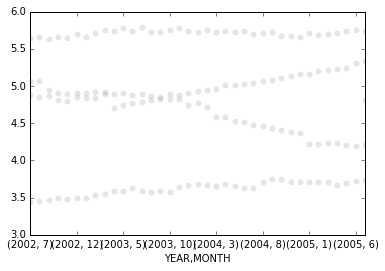

In [6]:
log_mavg_table = log10_(moving_avg(df_table))

# select firms by column characteristic
firm_measure = log10_(df_table).quantile(0.5)   # eg median
condition = firm_measure.loc[firm_measure > 3.5].index.values  # eg median > 3.5

# eg. clean small firms
log_mavg_table_sample = log_mavg_table[condition]

#Horizontal plot of time evolution:
df_plot = log_mavg_table_sample
df_plot.sample(20, axis = 1).plot(marker = 'o', legend=False, alpha = .2, linewidth = 0, mec = 'None', color = '.5')

In [7]:
def to_phase(df_table):
    """
    Computes size and growth for each firm at each time
    """
    growth = pd.DataFrame(df_table.diff().stack(), columns=['growth'])
    size = pd.DataFrame(df_table.stack(), columns=['size'])

    phase_df = pd.concat([size, growth], axis = 1).dropna().unstack()
    phase_df.columns = phase_df.columns.swaplevel()
    
    return phase_df


In [8]:
def DAY_MONTH_to_time(df_table):
    df_table_ = df_table.reset_index()
    df_table_['DAY'] = 1
    df_table_['date'] = pd.to_datetime(df_table_.YEAR*10000+df_table_.MONTH*100+df_table_.DAY,format='%Y%m%d')
    df_table_ = df_table_.set_index('date', drop = True).drop(['YEAR','MONTH'], axis = 1)
#     df_table_ = df_table_[df_table_.columns]
    return df_table_

/home/miglesia/anaconda2/lib/python2.7/site-packages/numexpr/cpuinfo.py:42: UserWarning: [Errno 12] Cannot allocate memory
  warnings.warn(str(e), UserWarning, stacklevel=stacklevel)


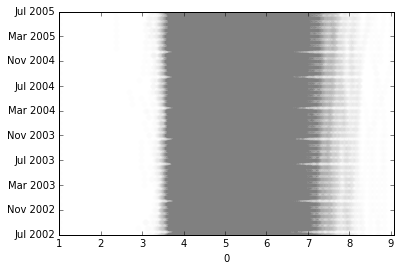

In [9]:
log_mavg_table_sample_ = DAY_MONTH_to_time(log_mavg_table_sample)

# Vertical plot
df_plot = log_mavg_table_sample_
df_plot.stack().reset_index().plot(x = 0, y = 'date',marker = 'o', legend=False, alpha = .01, linewidth = 0, mec = 'None', color = '.5')


### Trajectories in phase diagram

In [10]:
phase_df = to_phase(log_mavg_table_sample_)
tray = phase_df.sort_index(axis = 1)
sample = tray.columns.get_level_values('ID')


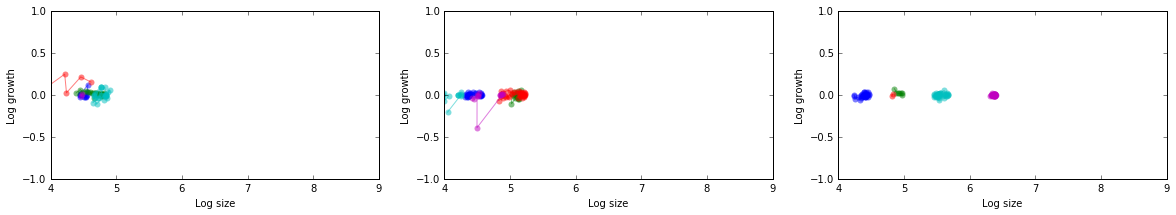

In [ ]:
# i, id
plot_n = 3
tray_n = 5

fig, axs = plt.subplots(1, plot_n, figsize = (20, 3))

for j in range(plot_n):
    ax = axs[j]
    tray_sample = tray.iloc[:, sample.isin(random.choice(sample, tray_n))]
    for date, tray_i in tray_sample.groupby(axis = 1, level=0): 
        i = tray_i.columns.get_level_values(0).drop_duplicates()[0]
        tray_i.plot(x = (i,'size'), y = (i,'growth'),marker = 'o', legend=False, alpha = .5, mec = 'None', ax = ax)

    ax.set_ylabel('Log growth')
    ax.set_xlabel('Log size')
    ax.set_xlim(4, 9)
    ax.set_ylim(-1, 1)
plt.show()

In [ ]:
# Determine activity periods
for years in arange(1998, 2014).reshape(4, 4):
    s = str(years[0])[-2:]; e = str(years[-1])[-2:];
    df_ = pd.read_csv(path1+'/samplings/firm_sample_YMmxp_'+s+'_'+e+'_nmax.csv')
    locals()['df_'+s+'_'+e] = df_
    
    for I in [0, 1]:
        df_i = df_.loc[df_.IMPORT == I]
        df_i = df_i.groupby(['ID', 'IMPORT','YEAR', 'MONTH'])[['VART_sum']].sum().unstack(level = (0))
        df_i.index = df_i.index.droplevel('IMPORT')
        df_i.columns = df_i.columns.droplevel(0)

        if I==0: locals()['df_'+s+'_'+e+'_x'] = df_i
        else: locals()['df_'+s+'_'+e+'_m'] = df_i
        
        
            

In [ ]:
def reverse(df):
    return (1 - df.fillna(0)).replace(0, nan)

def fill_inactivity_gaps(activity_df, n = 12):
    activity_ffil = activity_0.replace(0, nan).fillna(method = 'ffill', limit = n) # fill up to 12 months since last activity
    condition_0 = reverse(activity_ffil).fillna(limit = n, method = 'bfill') # undo fills that didn't bridge inactivity gap
    activity_bfil = reverse(condition_0) # fix boolean
    return (activity_ffil*activity_bfil).fillna(0).astype(int)

def margins(change_df, activity_n):
    entry = (activity_n.diff(12) == 1).astype(int)
    exit = (activity_n.diff(12) == -1).astype(int)
    
    growth = clip(change_df, 0, inf)
    shrink  = clip(change_df, -inf, 0)
    
    int_growth = growth * (activity_n - entry) # growth of non-entrants
    int_shrink = shrink * (activity_n - entry)
    ext_growth = change_df * entry
    ext_shrink = change_df * exit

    return ext_shrink, int_shrink, ext_growth, int_growth, growth, shrink

In [ ]:
# df_10_13_m = df_98_01_m
# df_10_13_x = df_98_01_x

df_98_01_x

In [ ]:
result = []

yrs = 3.
relative_to_sign = False
relative_to_abs = True

n = 40

for i in range(8):

    df_ = [df_98_01_x, df_02_05_x, df_06_09_x, df_10_13_x,
       df_98_01_m, df_02_05_m, df_06_09_m, df_10_13_m][i]

    IMPORT = i / 4
    time_period = i%4

    log_exp = log10(df_).mean()
    size_bins = pd.cut(log_exp.replace(-inf, nan).fillna(0), n, labels = False)

    for size in range(n):
        df_size = df_[list(size_bins.loc[size_bins == size].index)] # Firms of the given size

        activity_0 = (df_size > 0).astype(int)
        activity_12 = fill_inactivity_gaps(activity_0)

        change = df_size.fillna(0).diff(12)

        ext_shrink, int_shrink, ext_growth, int_growth, growth, shrink = margins(change, activity_12)

        if relative_to_sign:
            for df in [ext_shrink, int_shrink]:
                df /= shrink.sum().sum()
            for df in [ext_growth, int_growth]:
                df /= growth.sum().sum()
            yrs = 1

        elif relative_to_abs:
            for df in [ext_shrink, int_shrink, ext_growth, int_growth]:
                df /= growth.sum().sum() - shrink.sum().sum()
            yrs = 1

        result += [{'Time_period': time_period, 'IMPORT': IMPORT, 'size_bin': size,
                'no_firms': len(df_size.dropna(axis = 1, how = 'all').columns),
                'export_volume': df_size.sum().sum()/yrs,
                'change': change.sum().sum()/yrs,
                'int_growth': int_growth.sum().sum()/yrs,
                'ext_growth': ext_growth.sum().sum()/yrs,
                'int_shrink': int_shrink.sum().sum()/yrs,
                'ext_shrink': ext_shrink.sum().sum()/yrs}]

result_df = pd.DataFrame(result)

In [ ]:
import seaborn as sns

fig, axs = plt.subplots(2, 4, figsize = (24, 10))

for i in range(2):
    for j in range(4):
        ax = axs[i][j]
        plot_df = result_df.loc[(result_df.IMPORT == i) & (result_df.Time_period == j)]
        plot_df[['size_bin', u'ext_shrink', u'int_shrink', u'ext_growth', u'int_growth']].plot.bar(x = 'size_bin', stacked=True, ax = ax, linewidth = 0, width = 1, legend=False)
        ax.set_xlim(5, n - 5)
plt.show()

fig, axs = plt.subplots(1, 4, figsize = (24, 4))

for j in range(4):
    ax = axs[j]
    plot_df = result_df.loc[result_df.Time_period == j]
    plot_df.loc[plot_df.IMPORT == 0][['size_bin','no_firms']].plot(x = 'size_bin', marker = 'o', color = '.7', mec = 'w', ax = ax, label = 'M')
    plot_df.loc[plot_df.IMPORT == 1][['size_bin','no_firms']].plot(x = 'size_bin', marker = '>', color = '.7', mec = 'w', ax = ax, label = 'X')
    ax.set_xlim(5, n - 5)
    ax.set_ylim(0, 30000)
    ax.legend(["M", "X"])

plt.show()


In [ ]:
import seaborn as sns

result_df = pd.DataFrame(result).dropna()

fig, ax = plt.subplots(1, figsize = (6, 6))
result_df[[u'extensive_change_neg', u'intensive_change_neg', u'extensive_change_pos', u'intensive_change_pos'
         ]].plot.bar(stacked=True, ax = ax, linewidth = 0, width = 1)
# (result_df['export_volume']/10).plot(ax = ax, color = '.8', marker = 'o', linewidth = 1, label = 'exp volume', mec = '.8', mfc = '.8', alpha = .7)
# (result_df.iloc[:, 0]/100).plot(ax = ax, color = 'w', marker = '*', linewidth = 1, label = 'exp volume', mec = 'w', mfc = 'w', alpha = .5)
# (-result_df['export_volume']/10).plot(ax = ax, color = '.8', marker = 'o', linewidth = 1, label = 'exp volume', mec = '.8', mfc = '.8', alpha = .7)
# (-result_df.iloc[:, 0]/100).plot(ax = ax, color = 'w', marker = '*', linewidth = 1, label = 'exp volume', mec = 'w', mfc = 'w', alpha = .5)

# (result_df['change']).plot(marker = '', color = 'k', mec = 'w', ax = ax, linewidth = 1.5)
ax.set_xlim(5, n - 5)
plt.show()

fig, ax = plt.subplots(1, figsize = (6, 2))
result_df['no_firms'].plot(marker = 'o', color = '.7', mec = 'w', ax = ax)
ax.set_xlim(5, n - 5)
plt.show()


In [ ]:
# Imports 2002 - 2005

In [ ]:
# Exports 2002-2005

In [ ]:
n = 50
log_exp = 
size_bins = pd.cut(log10(df_.mean()).replace(-inf, nan).fillna(0), n, labels = False)
df_size = df_[list(size_bins.loc[size_bins == size].index)]
change = df_size.fillna(0).diff(12)

In [ ]:
# df_size = df_[list(size_bins.loc[size_bins == 30].index)]
# change = df_size.fillna(0).diff(12)
# change

# clip(change, 0, inf).sum().sum()
result_df.iloc[:, 2:-2].columns